# **Exploratory Data Analysis (EDA) for Brent Oil Price Change Point Analysis**

This notebook provides a comprehensive exploratory data analysis of the Brent oil price time series data. The primary goal is to prepare the data for change point modeling and to visually identify key characteristics of the series, such as trends, volatility, and potential structural breaks. This analysis aligns with the project objective of studying how significant events affect oil prices.

## **1. Setup and Data Loading**

First, we will set up the environment by importing necessary libraries and defining the file paths. We'll then use our custom `data_loader.py` and `preprocessor.py` scripts to ingest and prepare the data.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# Add the project root to the path for module imports
current_dir = os.path.dirname(os.path.abspath(''))
project_root = os.path.dirname(current_dir)
sys.path.append(project_root)

from src.data_ingestion.data_loader import load_data
from src.data_processing.preprocessor import preprocess_data

# Define file paths assuming a standard project structure
PRICES_FILE_PATH = os.path.join(project_root, 'data', 'raw', 'BrentOilPrices.csv')
EVENTS_FILE_PATH = os.path.join(project_root, 'data', 'raw', 'events.csv')

# Load and preprocess the data
try:
    prices_raw, events_raw = load_data(PRICES_FILE_PATH, EVENTS_FILE_PATH)
    preprocessed_df = preprocess_data(prices_raw, events_raw)
    print("\nPreprocessed DataFrame Head:\n", preprocessed_df.head())
except FileNotFoundError as e:
    print(f"Error: {e}")

Error: Price data file not found at: /home/micha/Downloads/course/10-accedemy/data/raw/BrentOilPrices.csv


## **2. Data Inspection and Summarization**

We will perform a basic inspection of the preprocessed data to understand its structure, check for missing values, and view summary statistics.

In [11]:
print("--- Data Information ---")
preprocessed_df.info()

print("\n--- Summary Statistics ---")
print(preprocessed_df.describe())

--- Data Information ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9010 entries, 1987-05-21 to 2022-11-14
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        9010 non-null   float64
 1   Log_Returns  9010 non-null   float64
 2   Event_Name   9010 non-null   object 
 3   Description  9010 non-null   object 
dtypes: float64(2), object(2)
memory usage: 352.0+ KB

--- Summary Statistics ---
             Price  Log_Returns
count  9010.000000  9010.000000
mean     48.424089     0.000179
std      32.860435     0.025532
min       9.100000    -0.643699
25%      19.050000    -0.011154
50%      38.600000     0.000402
75%      70.095000     0.012127
max     143.950000     0.412023


## **3. Temporal Analysis**

The core of our EDA will be to visualize the time series. This helps us identify trends, seasonality, and sudden shocks. We will plot both the raw price series and the log returns.

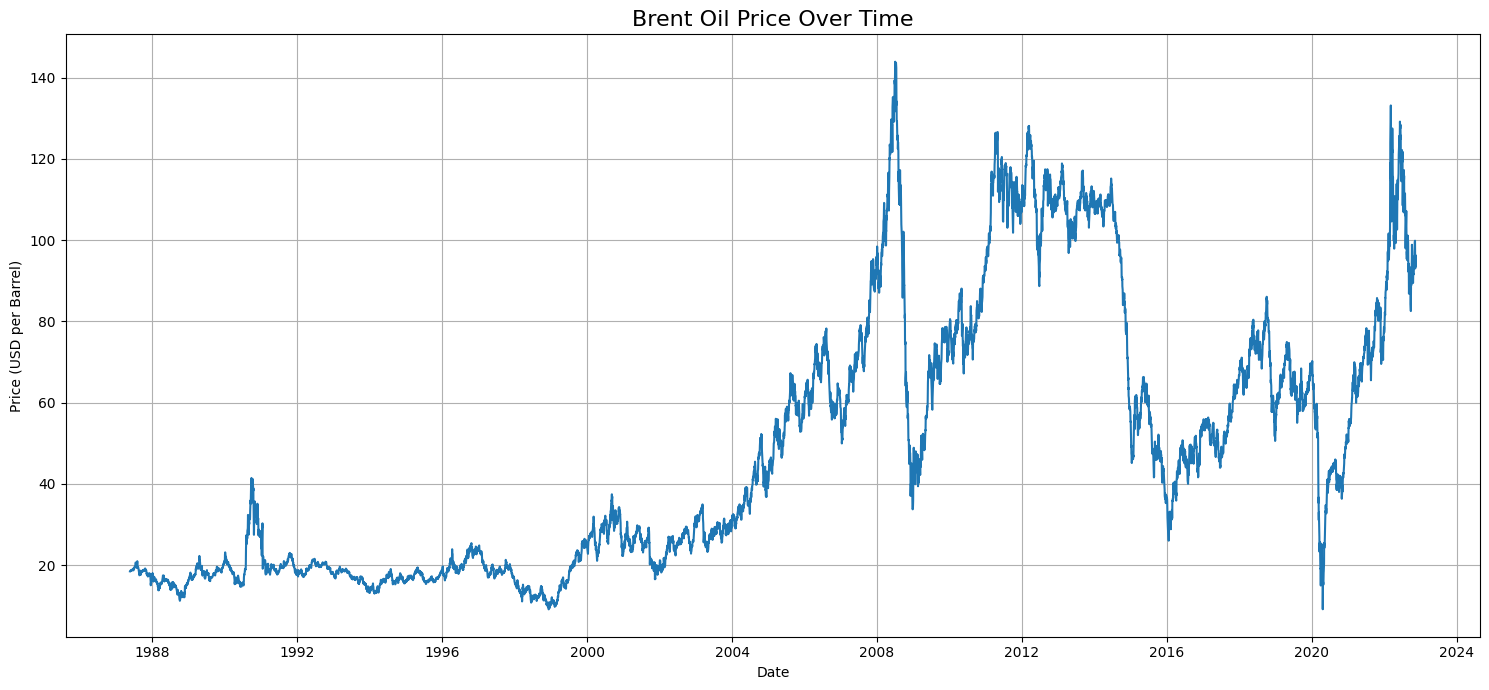

In [12]:
plt.figure(figsize=(15, 7))
sns.lineplot(data=preprocessed_df, x=preprocessed_df.index, y='Price')
plt.title('Brent Oil Price Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Price (USD per Barrel)')
plt.grid(True)
plt.tight_layout()
plt.show()

### **Log Returns Series**

Plotting the log returns is crucial for time series analysis as it helps achieve stationarity and allows us to observe volatility clustering, which are periods of high volatility followed by other periods of high volatility. This is often a sign of a structural break or a change point.

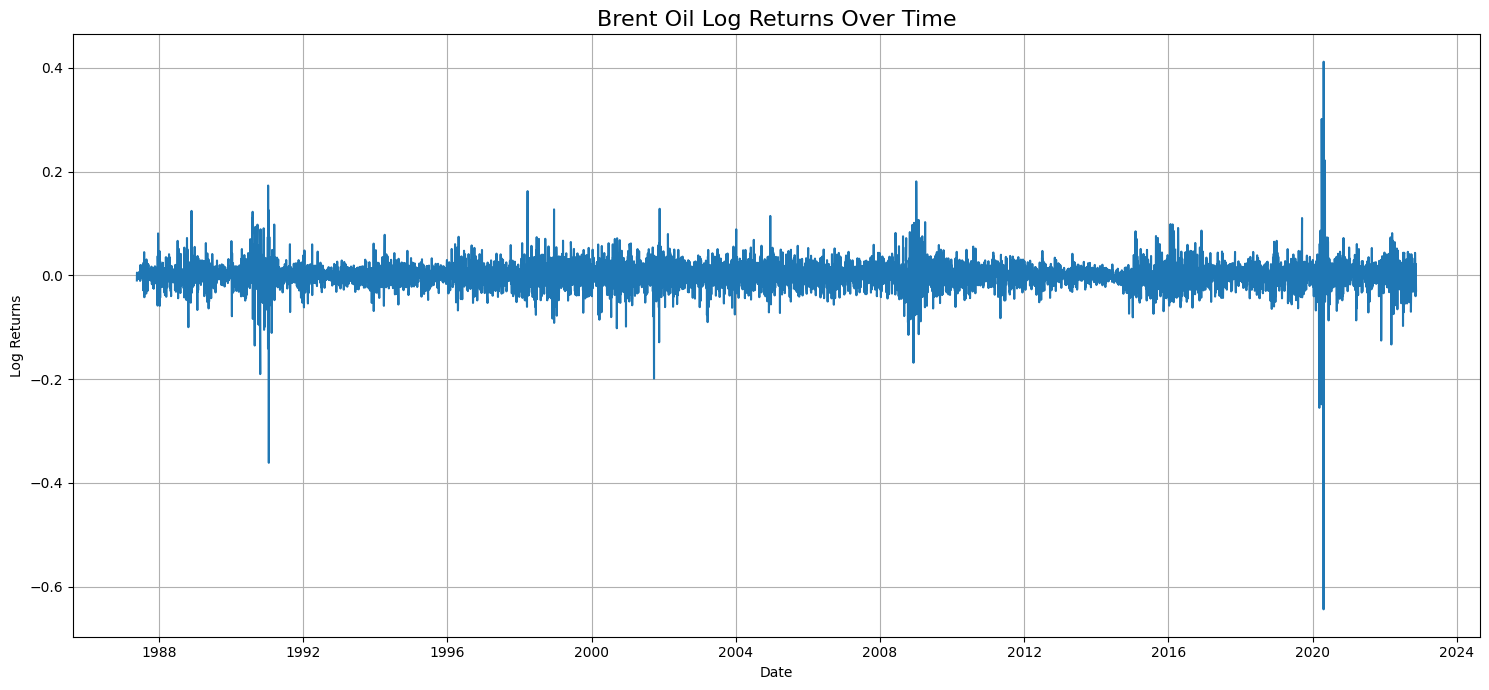

In [13]:
plt.figure(figsize=(15, 7))
sns.lineplot(data=preprocessed_df, x=preprocessed_df.index, y='Log_Returns')
plt.title('Brent Oil Log Returns Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.grid(True)
plt.tight_layout()
plt.show()

## **4. Univariate Analysis**

Finally, we'll examine the distribution of the log returns using a histogram and a Kernel Density Estimate (KDE). This will help us understand the statistical properties of the series, such as its central tendency and tail behavior.

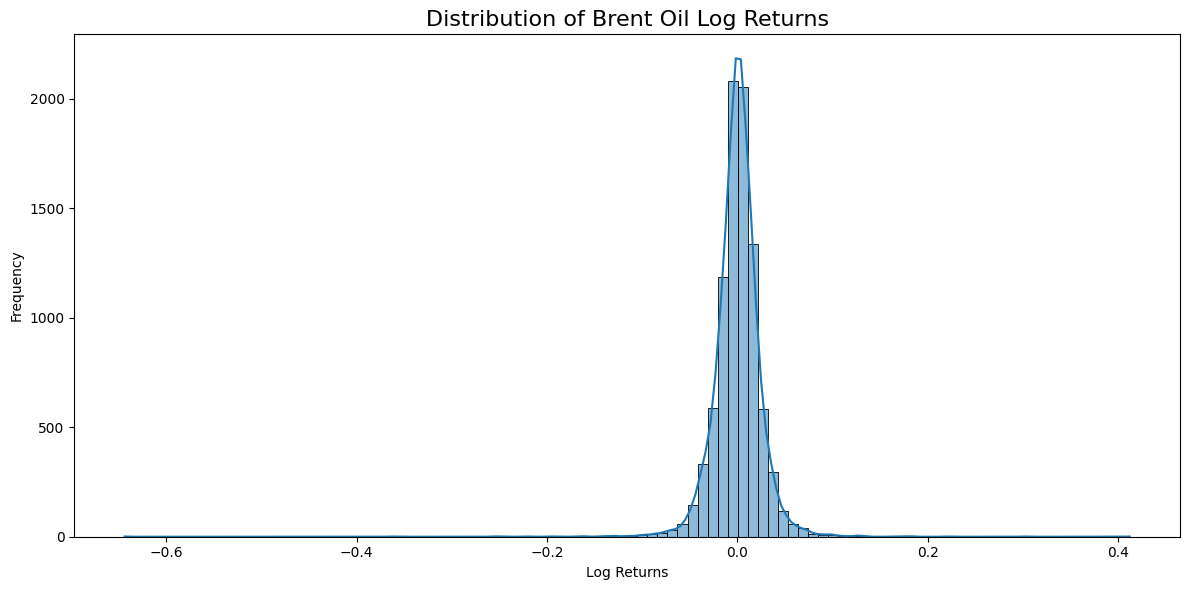

In [14]:
plt.figure(figsize=(12, 6))
sns.histplot(preprocessed_df['Log_Returns'].dropna(), bins=100, kde=True)
plt.title('Distribution of Brent Oil Log Returns', fontsize=16)
plt.xlabel('Log Returns')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## **5. Conclusion**

The EDA has provided key insights into the Brent oil price series:

- The raw price series shows a clear long-term upward trend, with several periods of sharp increases and decreases.
- The log returns series appears stationary, fluctuating around zero. It clearly highlights periods of high volatility (volatility clustering), which correspond to the dramatic price shocks seen in the raw series.
- The distribution of log returns, as seen in the histogram, is approximately bell-shaped but with fatter tails than a normal distribution, which is a common characteristic of financial time series.

These findings confirm the suitability of the data for change point analysis and provide a strong foundation for the next steps of our project.

## **6. Key Insights and Summary**

Based on the exploratory data analysis, we have drawn the following key insights that will inform our change point modeling:

1.  **Data Quality:** The data has been successfully loaded and preprocessed. All dates are in the correct format, and a dedicated `Log_Returns` column has been created, which is essential for our time series modeling.
2.  **Trends and Volatility:** The raw price series is non-stationary and exhibits a clear upward trend over the decades, punctuated by major, sudden shocks. The log returns series, however, is stationary and centered around zero, making it suitable for analysis.
3.  **Volatility Clustering:** The plots of the log returns clearly show volatility clustering, where periods of high variability are grouped together. These clusters are often indicative of significant events or changes in market dynamics, which is the primary objective of our change point analysis.
4.  **Distribution:** The distribution of log returns is leptokurtic (fat-tailed), which means extreme events are more frequent than a standard normal distribution would suggest. This insight is critical for selecting a probabilistic model for change point detection, as a model that assumes normality may not be the best fit.